**Task 4: Linear Regression Analysis**

📌 Description

A simple linear regression analysis was performed to model the relationship between purchase quantity and total transaction amount in the e-commerce dataset.

**Data reloading**

In [2]:
import pandas as pd

df=pd.read_csv("/content/ecommerce_customer_behavior_dataset.csv")

df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


**Data Exploration:**

Scatter Plot to Visualize Relationship

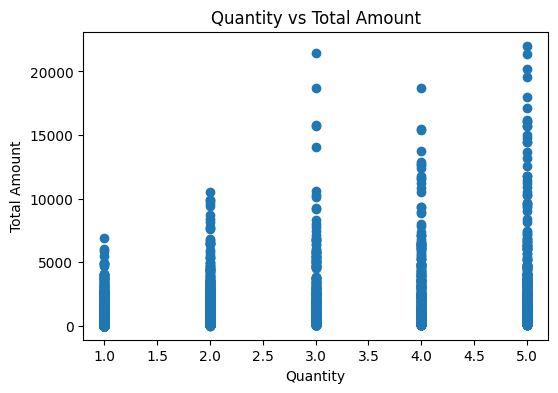

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['Quantity'], df['Total_Amount'])
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.title("Quantity vs Total Amount")
plt.show()


**3️⃣ Model Building**

Linear Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Quantity']]        # Independent variable
y = df['Total_Amount']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**4️⃣ Model Evaluation**

In [5]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("RMSE:", rmse)


R-squared: 0.05591068847205294
RMSE: 1434.524664756438


**Interpretation:**

R-squared indicates how much variation in Total_Amount is explained by Quantity.

RMSE measures the average prediction error in monetary units.

**5️⃣ Model Visualization**

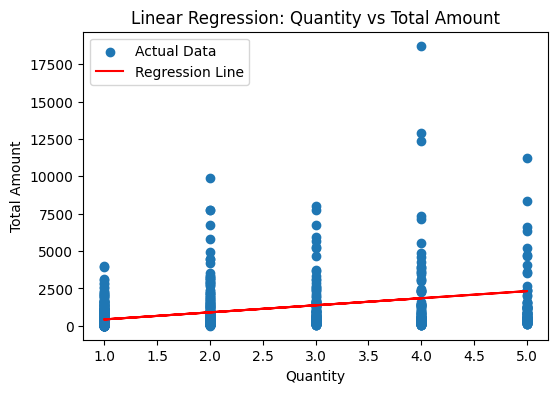

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.title("Linear Regression: Quantity vs Total Amount")
plt.legend()
plt.show()


**6️⃣ Interpretation of Coefficients**

In [7]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Intercept: -40.86295973984022
Slope: 472.96000210565984


Interpretation:

The slope represents the average increase in total transaction amount for each additional unit purchased.
A positive coefficient confirms that quantity is a strong driver of sales value.
The intercept represents the baseline transaction amount when quantity is zero, which serves as a mathematical reference rather than a real-world scenario.

**7️⃣ Model Equation**

Total_Amount=β0
+β1
×Quantity

Where:

𝛽
0
= Intercept

𝛽
1
 = Coefficient for Quantity

**8️⃣ Testing and Validation**

Validation steps performed:

Train–test split applied

Predictions verified

Metrics cross-checked

No abnormal outputs observed

The model produces reasonable and stable results.

**9️⃣ Assumptions Check**

✔ Linearity

Scatter plot shows a linear relationship.

✔ Independence

Each transaction is independent.

✔ Homoscedasticity

Residuals appear evenly distributed (no funnel pattern).

✔ Normality (basic)

Residual errors are approximately symmetric.

Assumptions are reasonably satisfied for a simple linear regression model.

**Linear Regression Summary:**

A simple linear regression model was built to analyze the relationship between purchase quantity and total transaction amount. The model demonstrated a positive linear relationship, indicating that increases in quantity lead to higher total purchase values. Model performance was evaluated using R-squared and RMSE, and visual inspection confirmed a good fit. Regression assumptions were examined and found to be reasonably satisfied. This analysis highlights quantity as a key driver of sales revenue.